# DAT 402 Project 1


Obesity is a growing health concern globally, leading to numerous chronic diseases and significant healthcare challenges. Identifying and addressing obesity levels early can help mitigate its impact on individual health and societal costs. With this project I aim to develop a machine learning model to accurately classify obesity levels of individuals based on their eating habits and physical condition. The dataset used includes records from individuals in Mexico, Peru, and Colombia, containing 17 attributes such as physical activity, dietary patterns, and other lifestyle factors and around 2000 records. I have chosen this dataset from the UC Irvine machine learning repository (https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)
I will be leveraging two different machine learning models that are apt for this multiclassification problem - Support vector machine and Decision tree. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
obesity = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

## Exploratory Data Analysis

In [3]:
obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [4]:
obesity['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [5]:
obesity.head(10)

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   
5    Male  29.0    1.62    53.0                             no  yes   2.0   
6  Female  23.0    1.50    55.0                            yes  yes   3.0   
7    Male  22.0    1.64    53.0                             no   no   2.0   
8    Male  24.0    1.78    64.0                            yes  yes   3.0   
9    Male  22.0    1.72    68.0                            yes  yes   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
5  3.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
6  3.0  Sometimes    no   2.0   no  1.0  0.0   Sometimes   
7  3.0  Sometimes    no   2.0   no  3.0  0.0   Sometimes   
8  3.0  Sometimes    no   2.0   no  1.0  1.0  Frequently   
9  3.0  Sometimes    no   2.0   no  1.0  1.0          no   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II  
5             Automobile        Normal_Weight  
6              Motorbike        Normal_Weight  
7  Public_Transportation        Normal_Weight  
8  Public_Transportation        Normal_Weight  
9  Public_Transportation        Normal_Weight

In [6]:
obesity.shape

(2111, 17)

In [7]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
obesity.rename(columns={'family_history_with_overweight': 'Overweight_history', 
                        'FAVC': 'High_calorie_diet',
                        'FCVC': 'Vegetable_meals',
                        'NCP': 'No_of_meals',
                        'CAEC': 'Snack_between_meals',
                        'CH2O':'Water',
                        'SCC' : 'Count_calories',
                        'FAF':'Physical_activity',
                        'TUE' :'Screentime',
                        'CALC' : 'Alcohol',
                        'MTRANS' : 'Transportation',
                        'NObeyesdad' : 'Obesity_level'
                       }, inplace=True)

In [9]:
obesity.head()

Gender   Age  Height  Weight Overweight_history High_calorie_diet  \
0  Female  21.0    1.62    64.0                yes                no   
1  Female  21.0    1.52    56.0                yes                no   
2    Male  23.0    1.80    77.0                yes                no   
3    Male  27.0    1.80    87.0                 no                no   
4    Male  22.0    1.78    89.8                 no                no   

   Vegetable_meals  No_of_meals Snack_between_meals SMOKE  Water  \
0              2.0          3.0           Sometimes    no    2.0   
1              3.0          3.0           Sometimes   yes    3.0   
2              2.0          3.0           Sometimes    no    2.0   
3              3.0          3.0           Sometimes    no    2.0   
4              2.0          1.0           Sometimes    no    2.0   

  Count_calories  Physical_activity  Screentime     Alcohol  \
0             no                0.0         1.0          no   
1            yes                3.0         0.0   Sometimes   
2             no                2.0         1.0  Frequently   
3             no                2.0         0.0  Frequently   
4             no                0.0         0.0   Sometimes   

          Transportation        Obesity_level  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [10]:
obesity['Obesity_level'].value_counts()

Obesity_level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

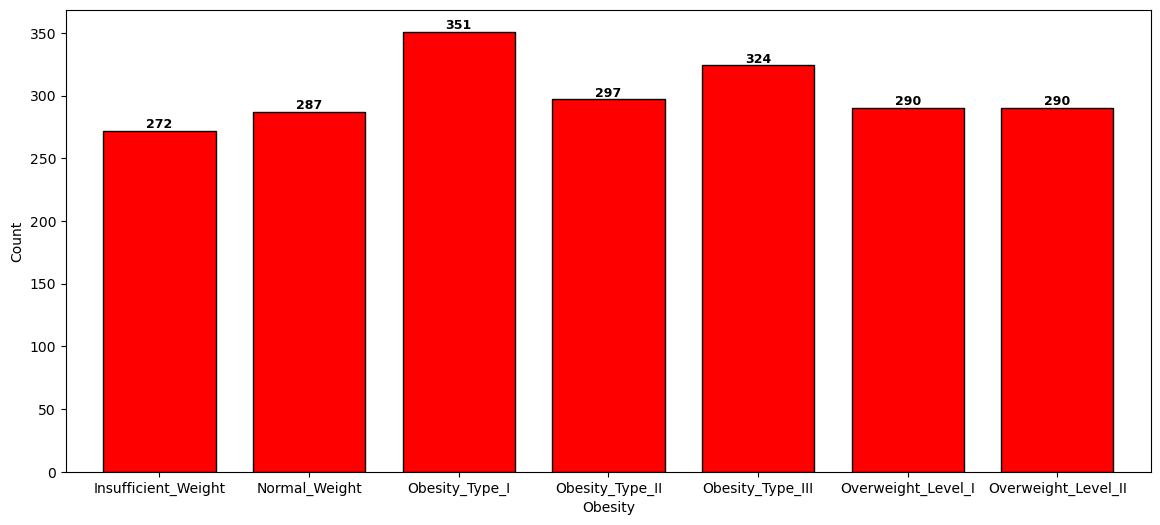

In [11]:
#Bar plot showing the value counts of each class of our target variable to check for imbalanced data
fig, ax1 = plt.subplots(1,1, figsize=(14,6))

obesity['Obesity_level'].value_counts().sort_index().plot(kind='bar', rot=0, ax=ax1, edgecolor='black', width=.75, color = 'red')

ax1.set_xlabel('Obesity')
ax1.set_ylabel('Count')

for container in ax1.containers:
    ax1.bar_label(container, fontweight='bold', fontsize=9)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Vegetable_meals'}>,
        <Axes: title={'center': 'No_of_meals'}>,
        <Axes: title={'center': 'Water'}>],
       [<Axes: title={'center': 'Physical_activity'}>,
        <Axes: title={'center': 'Screentime'}>, <Axes: >]], dtype=object)

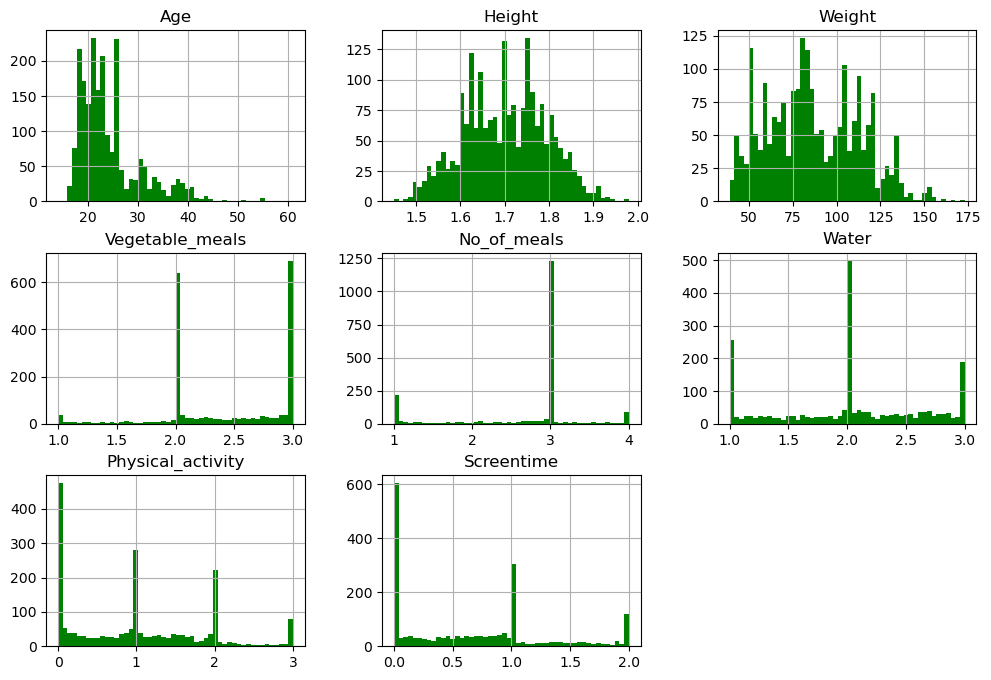

In [12]:
#Histogram of numeric predictors
obesity.select_dtypes(include=['float64']).hist(bins=50, figsize=(12,8), color = 'green')

In [13]:
#To look at the scale range of our numeric predictors
obesity.describe()

Age       Height       Weight  Vegetable_meals  No_of_meals  \
count  2111.000000  2111.000000  2111.000000      2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058         2.419043     2.685628   
std       6.345968     0.093305    26.191172         0.533927     0.778039   
min      14.000000     1.450000    39.000000         1.000000     1.000000   
25%      19.947192     1.630000    65.473343         2.000000     2.658738   
50%      22.777890     1.700499    83.000000         2.385502     3.000000   
75%      26.000000     1.768464   107.430682         3.000000     3.000000   
max      61.000000     1.980000   173.000000         3.000000     4.000000   

             Water  Physical_activity   Screentime  
count  2111.000000        2111.000000  2111.000000  
mean      2.008011           1.010298     0.657866  
std       0.612953           0.850592     0.608927  
min       1.000000           0.000000     0.000000  
25%       1.584812           0.124505     0.000000  
50%       2.000000           1.000000     0.625350  
75%       2.477420           1.666678     1.000000  
max       3.000000           3.000000     2.000000

<Axes: >

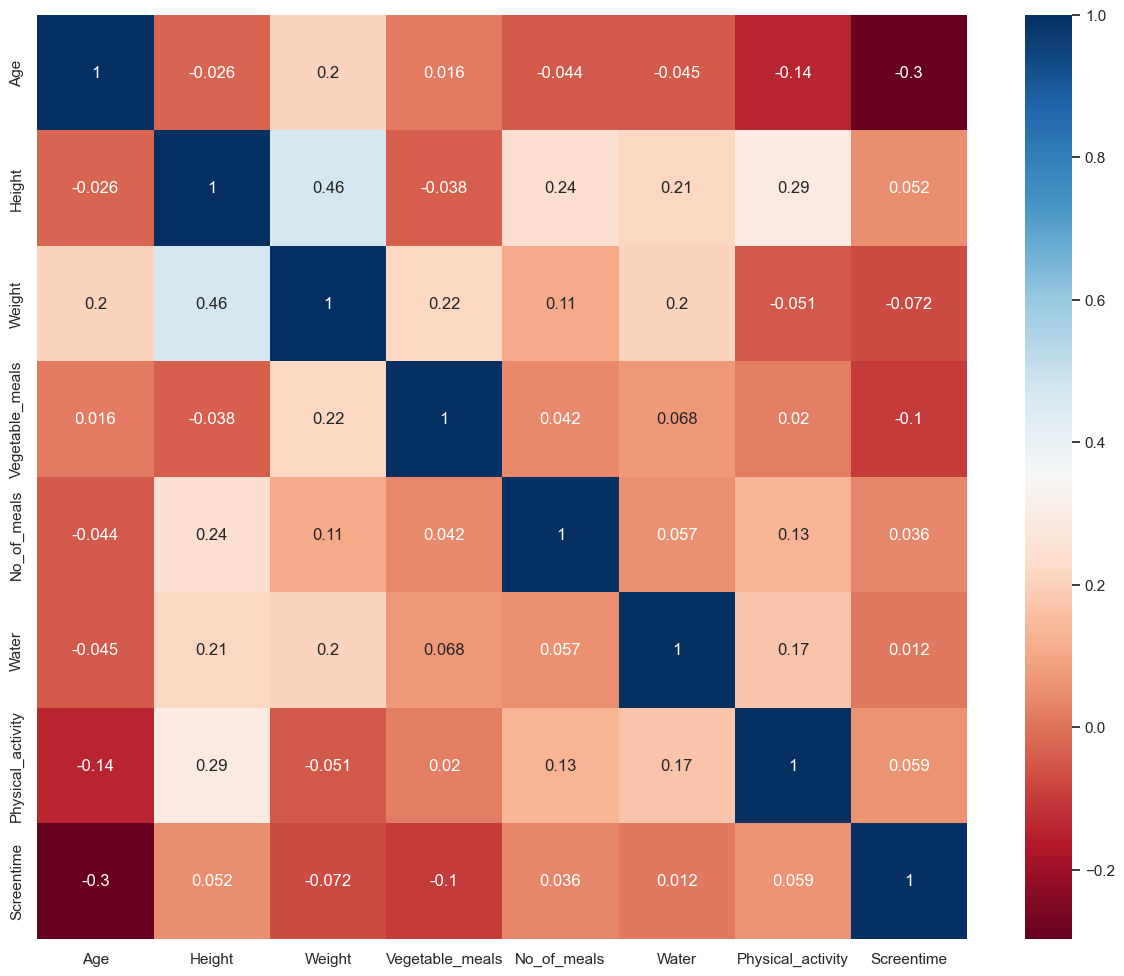

In [14]:
#Correlation map to find how the predictors affect each other 
corr = obesity.select_dtypes(include=np.number).corr()

sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(corr, annot= True,  cmap= "RdBu",xticklabels=corr.columns,yticklabels=corr.columns)

In [15]:
corr_matrix = obesity.corr(numeric_only=True)
corr_matrix

Age    Height    Weight  Vegetable_meals  No_of_meals  \
Age                1.000000 -0.025958  0.202560         0.016291    -0.043944   
Height            -0.025958  1.000000  0.463136        -0.038121     0.243672   
Weight             0.202560  0.463136  1.000000         0.216125     0.107469   
Vegetable_meals    0.016291 -0.038121  0.216125         1.000000     0.042216   
No_of_meals       -0.043944  0.243672  0.107469         0.042216     1.000000   
Water             -0.045304  0.213376  0.200575         0.068461     0.057088   
Physical_activity -0.144938  0.294709 -0.051436         0.019939     0.129504   
Screentime        -0.296931  0.051912 -0.071561        -0.101135     0.036326   

                      Water  Physical_activity  Screentime  
Age               -0.045304          -0.144938   -0.296931  
Height             0.213376           0.294709    0.051912  
Weight             0.200575          -0.051436   -0.071561  
Vegetable_meals    0.068461           0.019939   -0.101135  
No_of_meals        0.057088           0.129504    0.036326  
Water              1.000000           0.167236    0.011965  
Physical_activity  0.167236           1.000000    0.058562  
Screentime         0.011965           0.058562    1.000000

<Axes: xlabel='Age', ylabel='Screentime'>

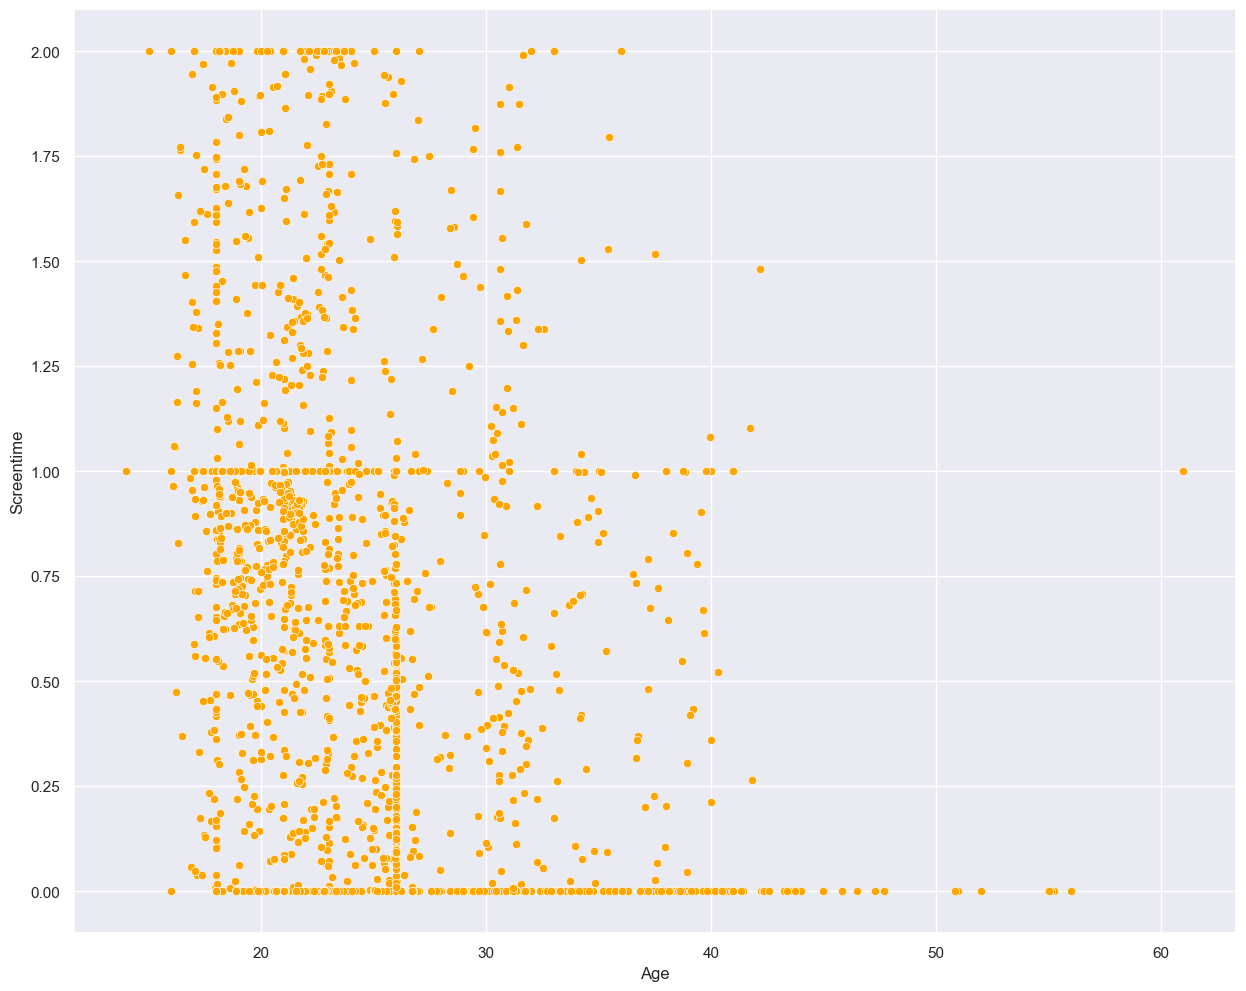

In [16]:
#Visualizing the correlation between Age and screentime in the form of a scatter plot
sns.scatterplot(x='Age', y='Screentime', data = obesity, color = 'orange')

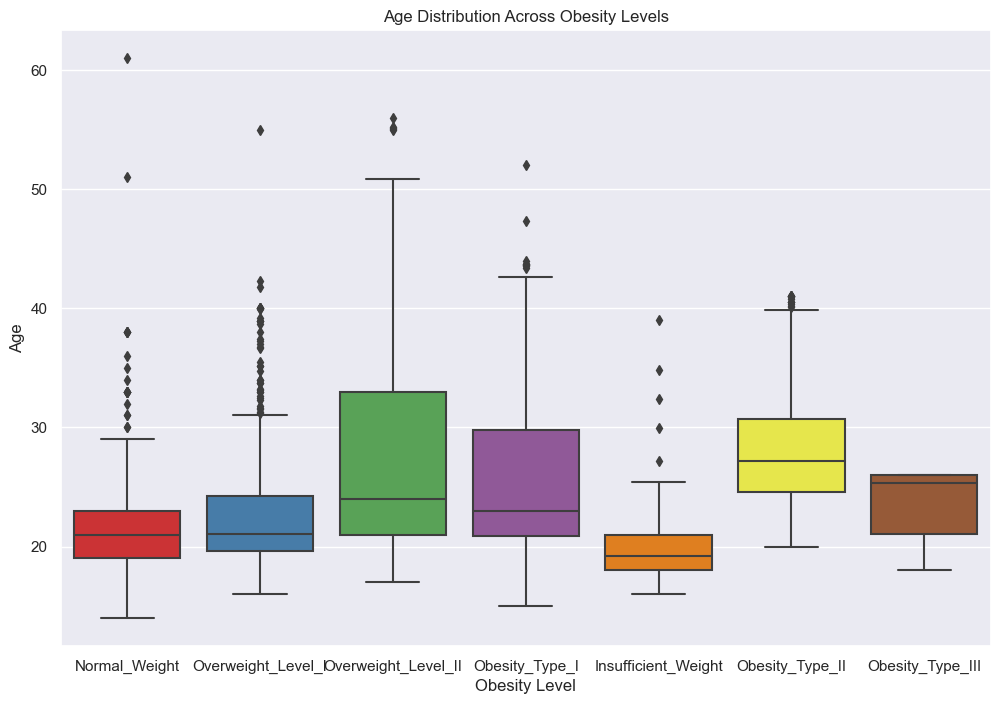

In [17]:
#Visualizing how obesity levels vary by age through box plots -  see outliers
plt.figure(figsize=(12, 8))

sns.boxplot(x='Obesity_level', y='Age', data=obesity, palette='Set1')


plt.title('Age Distribution Across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Age')

plt.show()

In [18]:
#Creating a column for numerical and ordered reperesentation of Obesity levels
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
              'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

obesity['Obesity_level'] = pd.Categorical(obesity['Obesity_level'], categories=categories, ordered=True)

obesity['Obesity_level_numeric'] = obesity['Obesity_level'].cat.codes

print(obesity[['Obesity_level_numeric', 'Obesity_level']].head(10))


   Obesity_level_numeric        Obesity_level
0                      1        Normal_Weight
1                      1        Normal_Weight
2                      1        Normal_Weight
3                      2   Overweight_Level_I
4                      3  Overweight_Level_II
5                      1        Normal_Weight
6                      1        Normal_Weight
7                      1        Normal_Weight
8                      1        Normal_Weight
9                      1        Normal_Weight


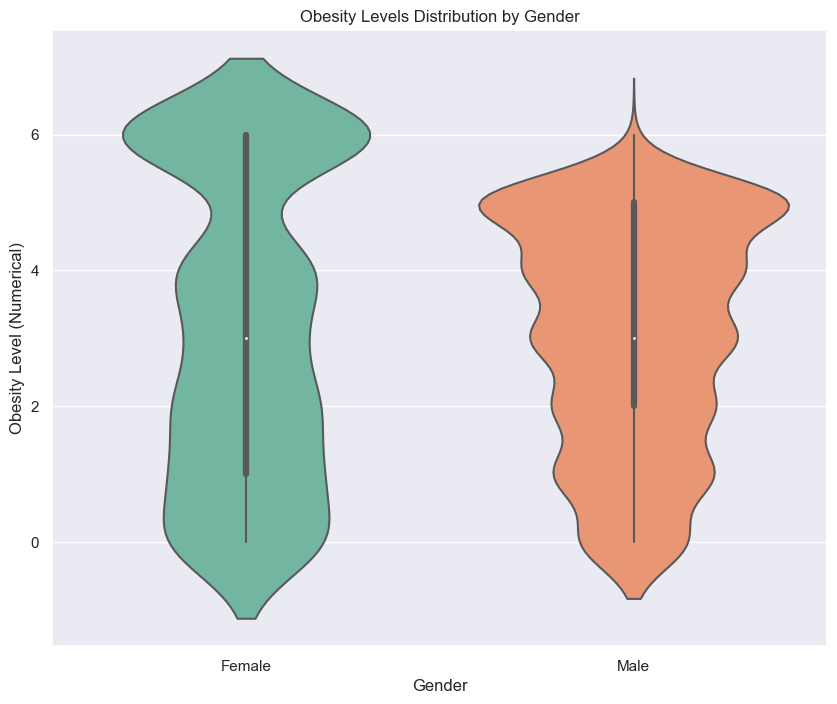

In [19]:
#Violin plot to see the clear(also fun) representation of obesity levels  across genders

plt.figure(figsize=(10, 8))

sns.violinplot(x='Gender', y='Obesity_level_numeric', data=obesity, palette='Set2')


plt.title('Obesity Levels Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Obesity Level (Numerical)')


plt.show()

/Users/Jaanvi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


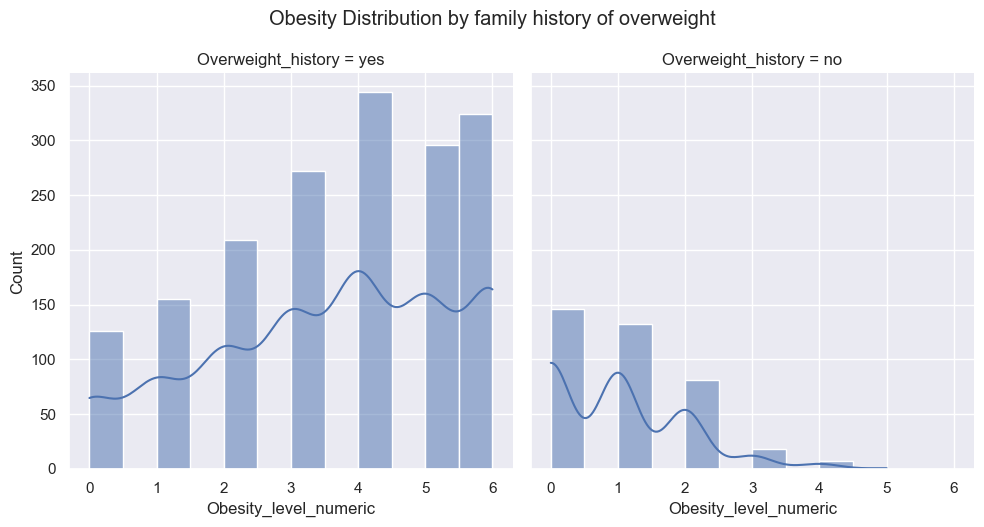

In [20]:
# Two plots comparing Obesity classifications given a family history of overweight
g = sns.FacetGrid(obesity, col='Overweight_history', height=5, aspect=1)

g.map(sns.histplot, 'Obesity_level_numeric', kde=True)

g.fig.suptitle('Obesity Distribution by family history of overweight', y=1.05)

plt.show()

#Dropping the numeric column to preserve the original dataset for Train/Test split
obesity.drop('Obesity_level_numeric', axis=1, inplace=True)

<Axes: xlabel='Obesity_level', ylabel='Count'>

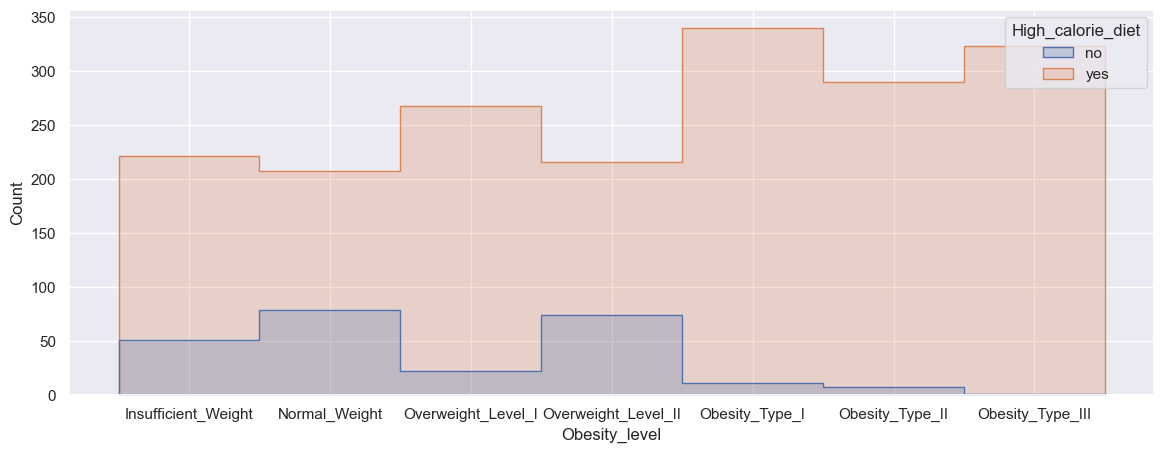

In [21]:
#Some insight on how high calorie diet relates to obesity levels
plt.figure(figsize= (14,5))

sns.histplot(obesity, x="Obesity_level", hue="High_calorie_diet",element="step")

In [22]:
#Decided to drop this column for convinience

obesity.drop('Transportation', axis=1, inplace=True)

# Train/Test split

In [23]:
#Defining our predictors and target variable
X = obesity[obesity.columns.difference(['Obesity_level'])]
y = obesity['Obesity_level']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
X_train

Age    Alcohol Count_calories  Gender    Height High_calorie_diet  \
162   21.000000  Sometimes             no  Female  1.630000               yes   
2001  20.924956  Sometimes             no  Female  1.752531               yes   
1435  22.899740  Sometimes             no  Female  1.661715               yes   
649   21.837996         no             no  Female  1.588046                no   
1280  25.994746  Sometimes             no    Male  1.811602               yes   
...         ...        ...            ...     ...       ...               ...   
1638  32.290160  Sometimes             no    Male  1.754956               yes   
1095  23.000000  Sometimes             no    Male  1.718981               yes   
1130  22.989846         no             no  Female  1.650000               yes   
1294  23.000000         no             no  Female  1.628168               yes   
860   20.000000  Sometimes             no    Male  1.817480               yes   

      No_of_meals Overweight_history  Physical_activity SMOKE  Screentime  \
162      3.000000                yes           2.000000   yes    0.000000   
2001     3.000000                yes           1.480919    no    0.779641   
1435     1.355354                yes           0.128342    no    1.659476   
649      1.696080                 no           1.098862    no    0.000000   
1280     3.000000                yes           1.813318    no    0.680215   
...           ...                ...                ...   ...         ...   
1638     3.000000                yes           0.955317    no    1.339232   
1095     1.729553                yes           0.887923    no    1.011983   
1130     3.000000                yes           0.146919    no    2.000000   
1294     2.962004                yes           0.851059    no    0.630866   
860      3.000000                yes           2.433918    no    0.561602   

     Snack_between_meals  Vegetable_meals     Water      Weight  
162               Always         3.000000  2.000000   60.000000  
2001           Sometimes         3.000000  2.887659  133.618706  
1435           Sometimes         1.203754  2.765593   82.595793  
649           Frequently         3.000000  2.550307   44.236067  
1280           Sometimes         3.000000  2.858171  106.042142  
...                  ...              ...       ...         ...  
1638           Sometimes         2.967300  2.530035  120.098812  
1095           Sometimes         2.000000  1.400247   81.669950  
1130           Sometimes         2.000000  2.000000   80.000000  
1294           Sometimes         2.058687  2.010596   84.497980  
860            Sometimes         2.951180  3.000000   85.000000  

[1688 rows x 15 columns]

## Encoding variables

In [25]:
#Encoding obsity levels(target) to numeric categories by order
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                                              'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 
                                              'Obesity_Type_III']])
# Only fitting it to training data
y_train = ordinal_encoder.fit_transform(y_train.values.reshape(-1,1))
y_test = ordinal_encoder.transform(y_test.values.reshape(-1,1))


In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

X_train['Gender'] = labelencoder.fit_transform(X_train['Gender'])
X_test['Gender'] = labelencoder.transform(X_test['Gender'])

In [27]:
#Encoding binary variables to binary 0 and 1 using label encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
columns_to_encode = ['Overweight_history', 'High_calorie_diet', 'SMOKE', 'Count_calories']

for column in columns_to_encode:
    X_train[column] = labelencoder.fit_transform(X_train[column])
# Only fitting it to training data 
for column in columns_to_encode:
    X_test[column] = labelencoder.transform(X_test[column])

In [28]:
#Encoding categorical variables to numeric values in order
ordinal_encoder = OrdinalEncoder(categories=[['no','Sometimes','Frequently','Always']])

X_train['Snack_between_meals'] = ordinal_encoder.fit_transform(X_train[['Snack_between_meals']])
X_test['Snack_between_meals'] = ordinal_encoder.transform(X_test[['Snack_between_meals']])

ordinal_encoder = OrdinalEncoder(categories=[['no','Sometimes','Frequently','Always']])

X_train['Alcohol'] = ordinal_encoder.fit_transform(X_train[['Alcohol']])
X_test['Alcohol'] = ordinal_encoder.transform(X_test[['Alcohol']])

## Decision Tree
After examining the scale ranges of all the variables, I decided to bucketize the predictor variables for meaningful splitting and reduce the likelihood of splitting

In [32]:
##A custom transformer for binning/bucketizing 

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array

class QuantileBucketer(BaseEstimator, TransformerMixin):
    def __init__(self, num_quantiles=10, random_state=42):
        self.num_quantiles = num_quantiles
        self.random_state = random_state

    def fit(self, X, y=None):
        if (isinstance(X, pd.DataFrame)):
            self.feature_names = np.array(X.columns)
        #If no columns, just 0 through n
        else:
            self.feature_names = np.array(range(0, X.shape[1])).astype(str)

        
        X = check_array(X)
    
        self.bins_ = []
        
     
        for i in range(np.shape(X)[1]):
            X_bucket, bins = pd.qcut(X[:,i],
                                 q=self.num_quantiles, labels=False, retbins=True, duplicates='drop')

            bins[0] = -np.inf
            bins[len(bins)-1] = np.inf
            
            self.bins_.append(bins)
        
        return self

    
    def transform(self, X):

        X = check_array(X)
        
        for i in range(np.shape(X)[1]):
            X[:, i] = pd.cut(X[:,i], bins=self.bins_[i], labels=False)
            
        return X


    def get_feature_names_out(self, names=None):
        return self.feature_names
            
bucket = QuantileBucketer(num_quantiles=10)

bucket_cols = ['Age', 'Height', 'Weight', 'Vegetable_meals', 'No_of_meals','Water','Physical_activity','Screentime']

bucket.fit(X_train[bucket_cols])

X_train_prepared = X_train.copy()
X_train_prepared[bucket_cols] = bucket.transform(X_train[bucket_cols])
#same for the test set
X_test_prepared = X_test.copy()
X_test_prepared[bucket_cols] = bucket.transform(X_test[bucket_cols])
#This is the training set for bucketized features
X_train_prepared.head()

Age  Alcohol  Count_calories  Gender  Height  High_calorie_diet  \
162   3.0      1.0               0       0     2.0                  1   
2001  3.0      1.0               0       0     6.0                  1   
1435  5.0      1.0               0       0     3.0                  1   
649   4.0      0.0               0       0     1.0                  0   
1280  7.0      1.0               0       1     8.0                  1   

      No_of_meals  Overweight_history  Physical_activity  SMOKE  Screentime  \
162           3.0                   1                7.0      1         0.0   
2001          3.0                   1                6.0      0         3.0   
1435          1.0                   1                1.0      0         6.0   
649           1.0                   0                5.0      0         0.0   
1280          3.0                   1                6.0      0         3.0   

      Snack_between_meals  Vegetable_meals  Water  Weight  
162                   3.0              4.0    3.0     1.0  
2001                  1.0              4.0    7.0     9.0  
1435                  1.0              0.0    7.0     4.0  
649                   2.0              4.0    6.0     0.0  
1280                  1.0              4.0    7.0     7.0

In [33]:
#Creating a default decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train_prepared, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
#Getting the accuracy score as 1, which means our tree has overfitted the training data(grown too deep)
tree.score(X_train_prepared, y_train)

1.0

In [35]:
#can also be seen by the accuracy score on the test data
from sklearn.metrics import accuracy_score
y_pred = tree.predict(X_test_prepared)
accuracy_score(y_pred, y_test)

0.8936170212765957

Now we need to do some hyperparameter tuning in order to produce the best model and tackle the overfitting due to the tree growing deep enough as it has perfectly memorized the labels of the training set and did not perform well on the unseen test data


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],           # different split criteria
    'max_depth': [6, 8, 4],    # tree depth
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train_prepared, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 8}


In [37]:
#Pruned the tree based on the best parameters found by Grid search method
tree_pruned = DecisionTreeClassifier(max_depth =8, random_state = 42, criterion = 'entropy')
tree_pruned.fit(X_train_prepared, y_train)
print(tree_pruned.score(X_train_prepared, y_train))
y_pred = tree.predict(X_test_prepared)
print(accuracy_score(y_pred, y_test))

0.9543838862559242
0.8936170212765957


Now the tree performed a little better on the training set than the test set but it is good enough and is not overfitted

In [38]:
#looking at variable importance in decision tree
importance = pd.DataFrame(tree_pruned.feature_importances_, index = X_train_prepared.columns, columns = ["Importance"])
importance.sort_values(by = "Importance", ascending = False)

Importance
Weight                 0.554314
Height                 0.160998
Gender                 0.134516
Age                    0.027751
Vegetable_meals        0.023103
Water                  0.021809
No_of_meals            0.019028
Screentime             0.016851
Physical_activity      0.015700
High_calorie_diet      0.014906
Snack_between_meals    0.008719
Alcohol                0.002305
Count_calories         0.000000
Overweight_history     0.000000
SMOKE                  0.000000

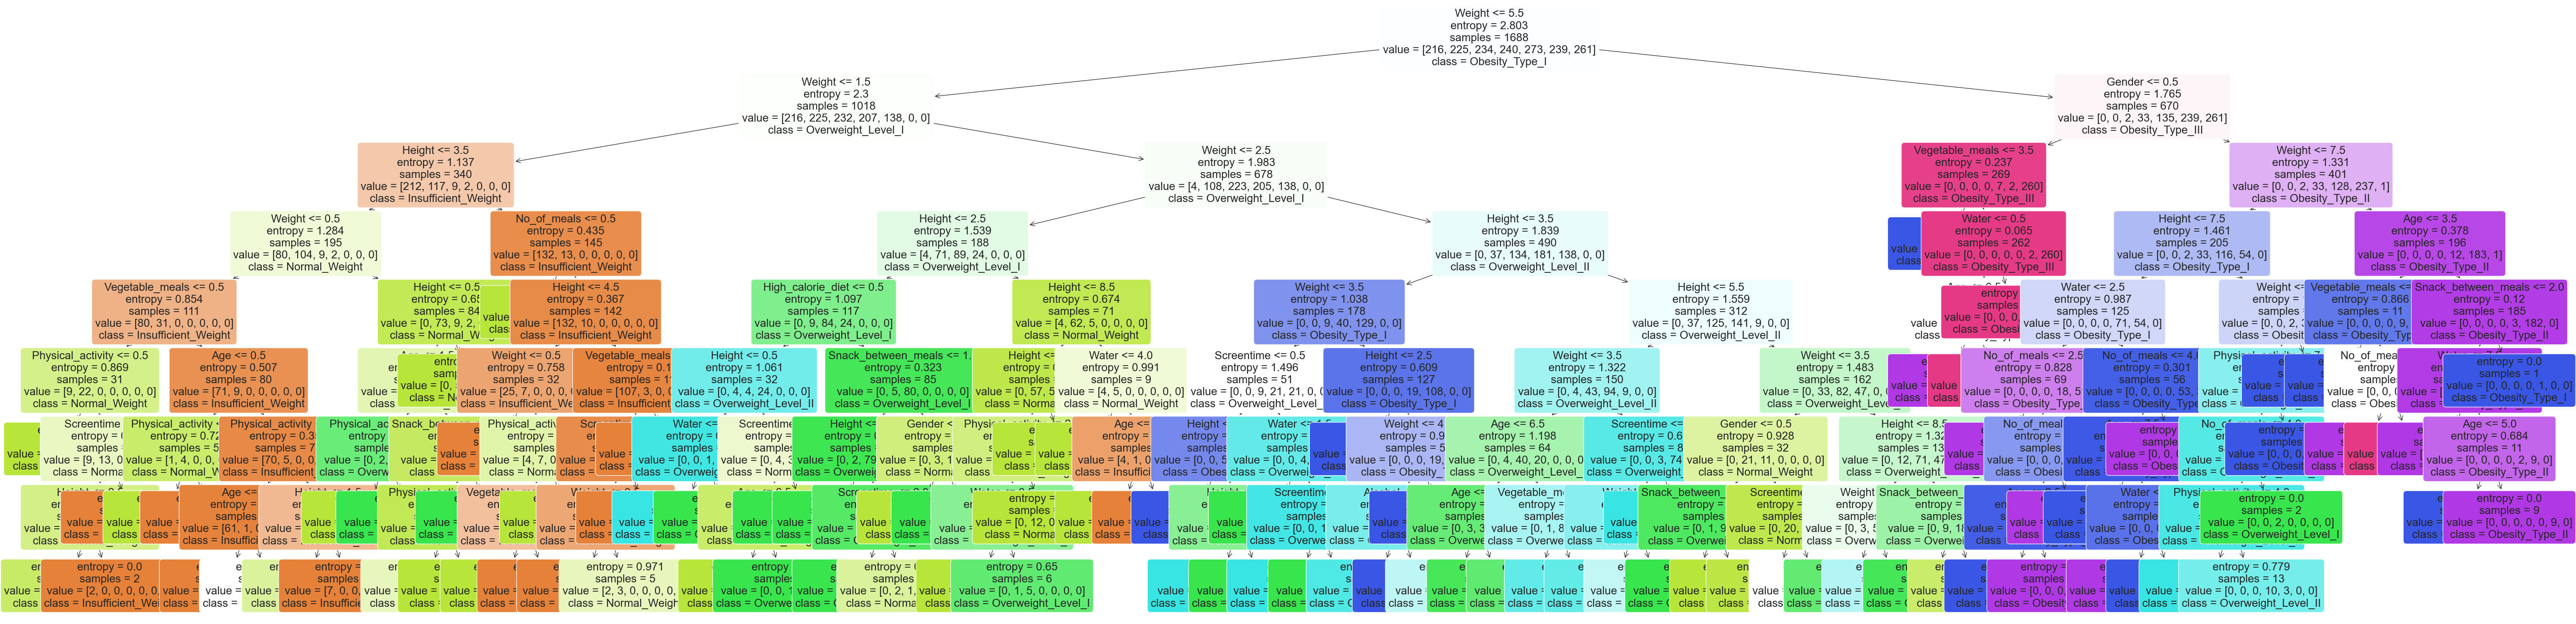

In [39]:
#Visualizing the tree for deeper understanding of root nodes, leaf nodes etc
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(80,20))
feature_names = X_train_prepared.columns.tolist()
display_tree = plot_tree(tree_pruned,
              feature_names=feature_names,
              class_names=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                                              'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 
                                              'Obesity_Type_III'],
              filled=True,
              rounded=True,
              fontsize=20)

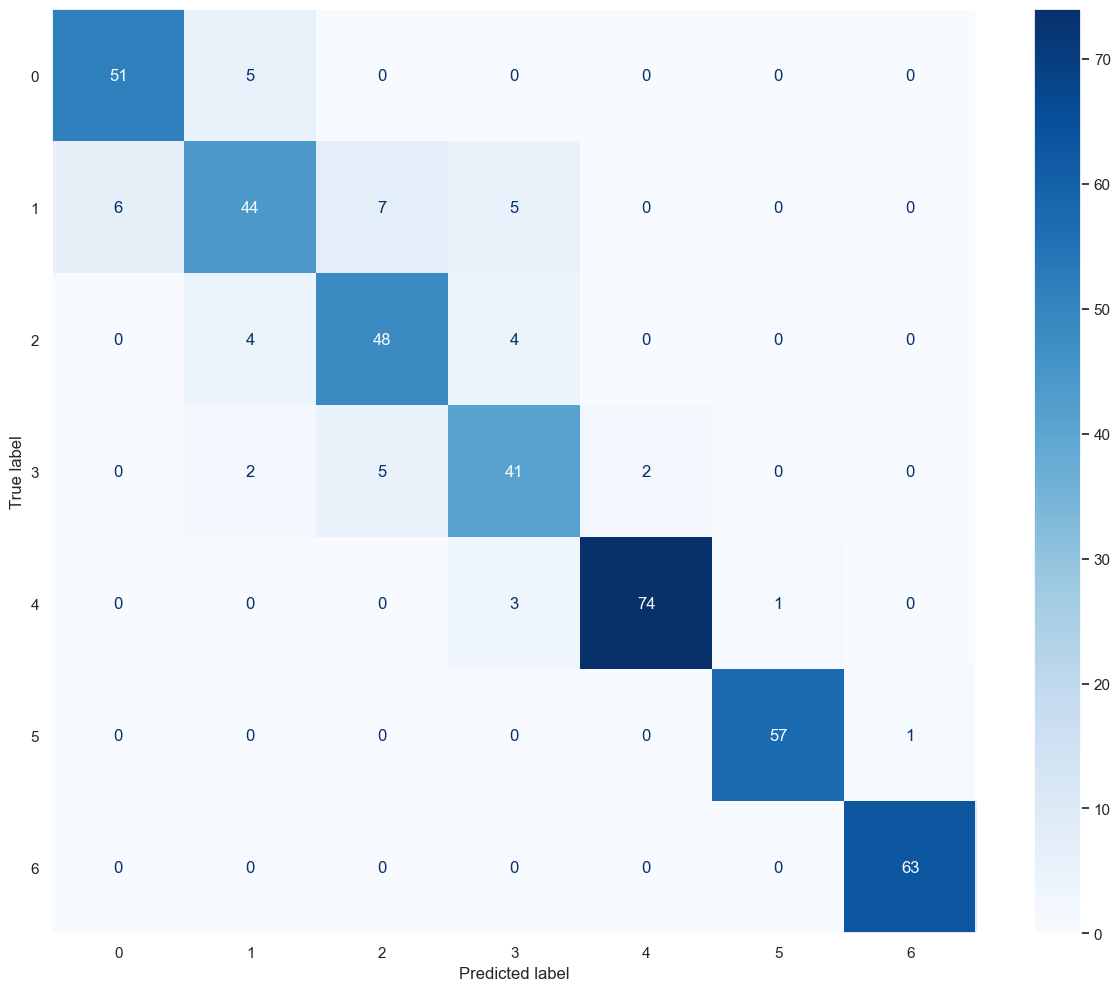

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

plt.show()


In [41]:
#Dislaying important metrics to interpret the model performace
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90        56
         1.0       0.80      0.71      0.75        62
         2.0       0.80      0.86      0.83        56
         3.0       0.77      0.82      0.80        50
         4.0       0.97      0.95      0.96        78
         5.0       0.98      0.98      0.98        58
         6.0       0.98      1.00      0.99        63

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.89      0.89      0.89       423



Observation - The higher level classes had a higher prediction accuracy and the model had the hardest time(less accuracy) accurately predicting the middle class.

## Support Vector Machine (SVM)
Support vector machine is sensitive to the scales of features, hence why I decided to scale the data for this model instead of using the bucketized variables

In [42]:
# Scale data for SVM

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()


# Step 1: Separate numeric and non-numeric columns
X_train_numeric = X_train.select_dtypes(include=np.number)
X_train_non_numeric = X_train.select_dtypes(exclude=np.number)

X_test_numeric = X_test.select_dtypes(include=np.number)
X_test_non_numeric = X_test.select_dtypes(exclude=np.number)

# Step 2: Scale numeric columns
X_train_numeric_scaled = pd.DataFrame(std_scaler.fit_transform(X_train_numeric), 
                                      columns=X_train_numeric.columns, 
                                      index=X_train.index)

X_test_numeric_scaled = pd.DataFrame(std_scaler.transform(X_test_numeric), 
                                     columns=X_test_numeric.columns, 
                                     index=X_test.index)

# Step 3: Concatenate scaled numeric columns with non-numeric columns
X_train_scaled = pd.concat([X_train_numeric_scaled, X_train_non_numeric], axis=1)
X_test_scaled = pd.concat([X_test_numeric_scaled, X_test_non_numeric], axis=1)

# Now X_train_scaled and X_test_scaled contain both scaled numeric features and original non-numeric features


#This is our scaled training set
X_train_scaled.head()

Age   Alcohol  Count_calories    Gender    Height  \
162  -0.532646  0.525657       -0.214123 -1.013119 -0.768029   
2001 -0.544235  0.525657       -0.214123 -1.013119  0.546078   
1435 -0.239258  0.525657       -0.214123 -1.013119 -0.427896   
649  -0.403229 -1.411698       -0.214123 -1.013119 -1.217973   
1280  0.238722  0.525657       -0.214123  0.987051  1.179597   

      High_calorie_diet  No_of_meals  Overweight_history  Physical_activity  \
162            0.355083     0.401513            0.469612           1.186213   
2001           0.355083     0.401513            0.469612           0.567871   
1435           0.355083    -1.700740            0.469612          -1.043353   
649           -2.816242    -1.265210           -2.129419           0.112755   
1280           0.355083     0.401513            0.469612           0.963833   

         SMOKE  Screentime  Snack_between_meals  Vegetable_meals     Water  \
162   6.502465   -1.069472             3.886490         1.076717 -0.010142   
2001 -0.153788    0.224537            -0.302779         1.076717  1.446428   
1435 -0.153788    1.684843            -0.302779        -2.268694  1.246128   
649  -0.153788   -1.069472             1.791856         1.076717  0.892863   
1280 -0.153788    0.059515            -0.302779         1.076717  1.398040   

        Weight  
162  -1.019413  
2001  1.802127  
1435 -0.153398  
649  -1.623588  
1280  0.745216

Visualized the relationship between target and predictor variables to see the linearity

/Users/Jaanvi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


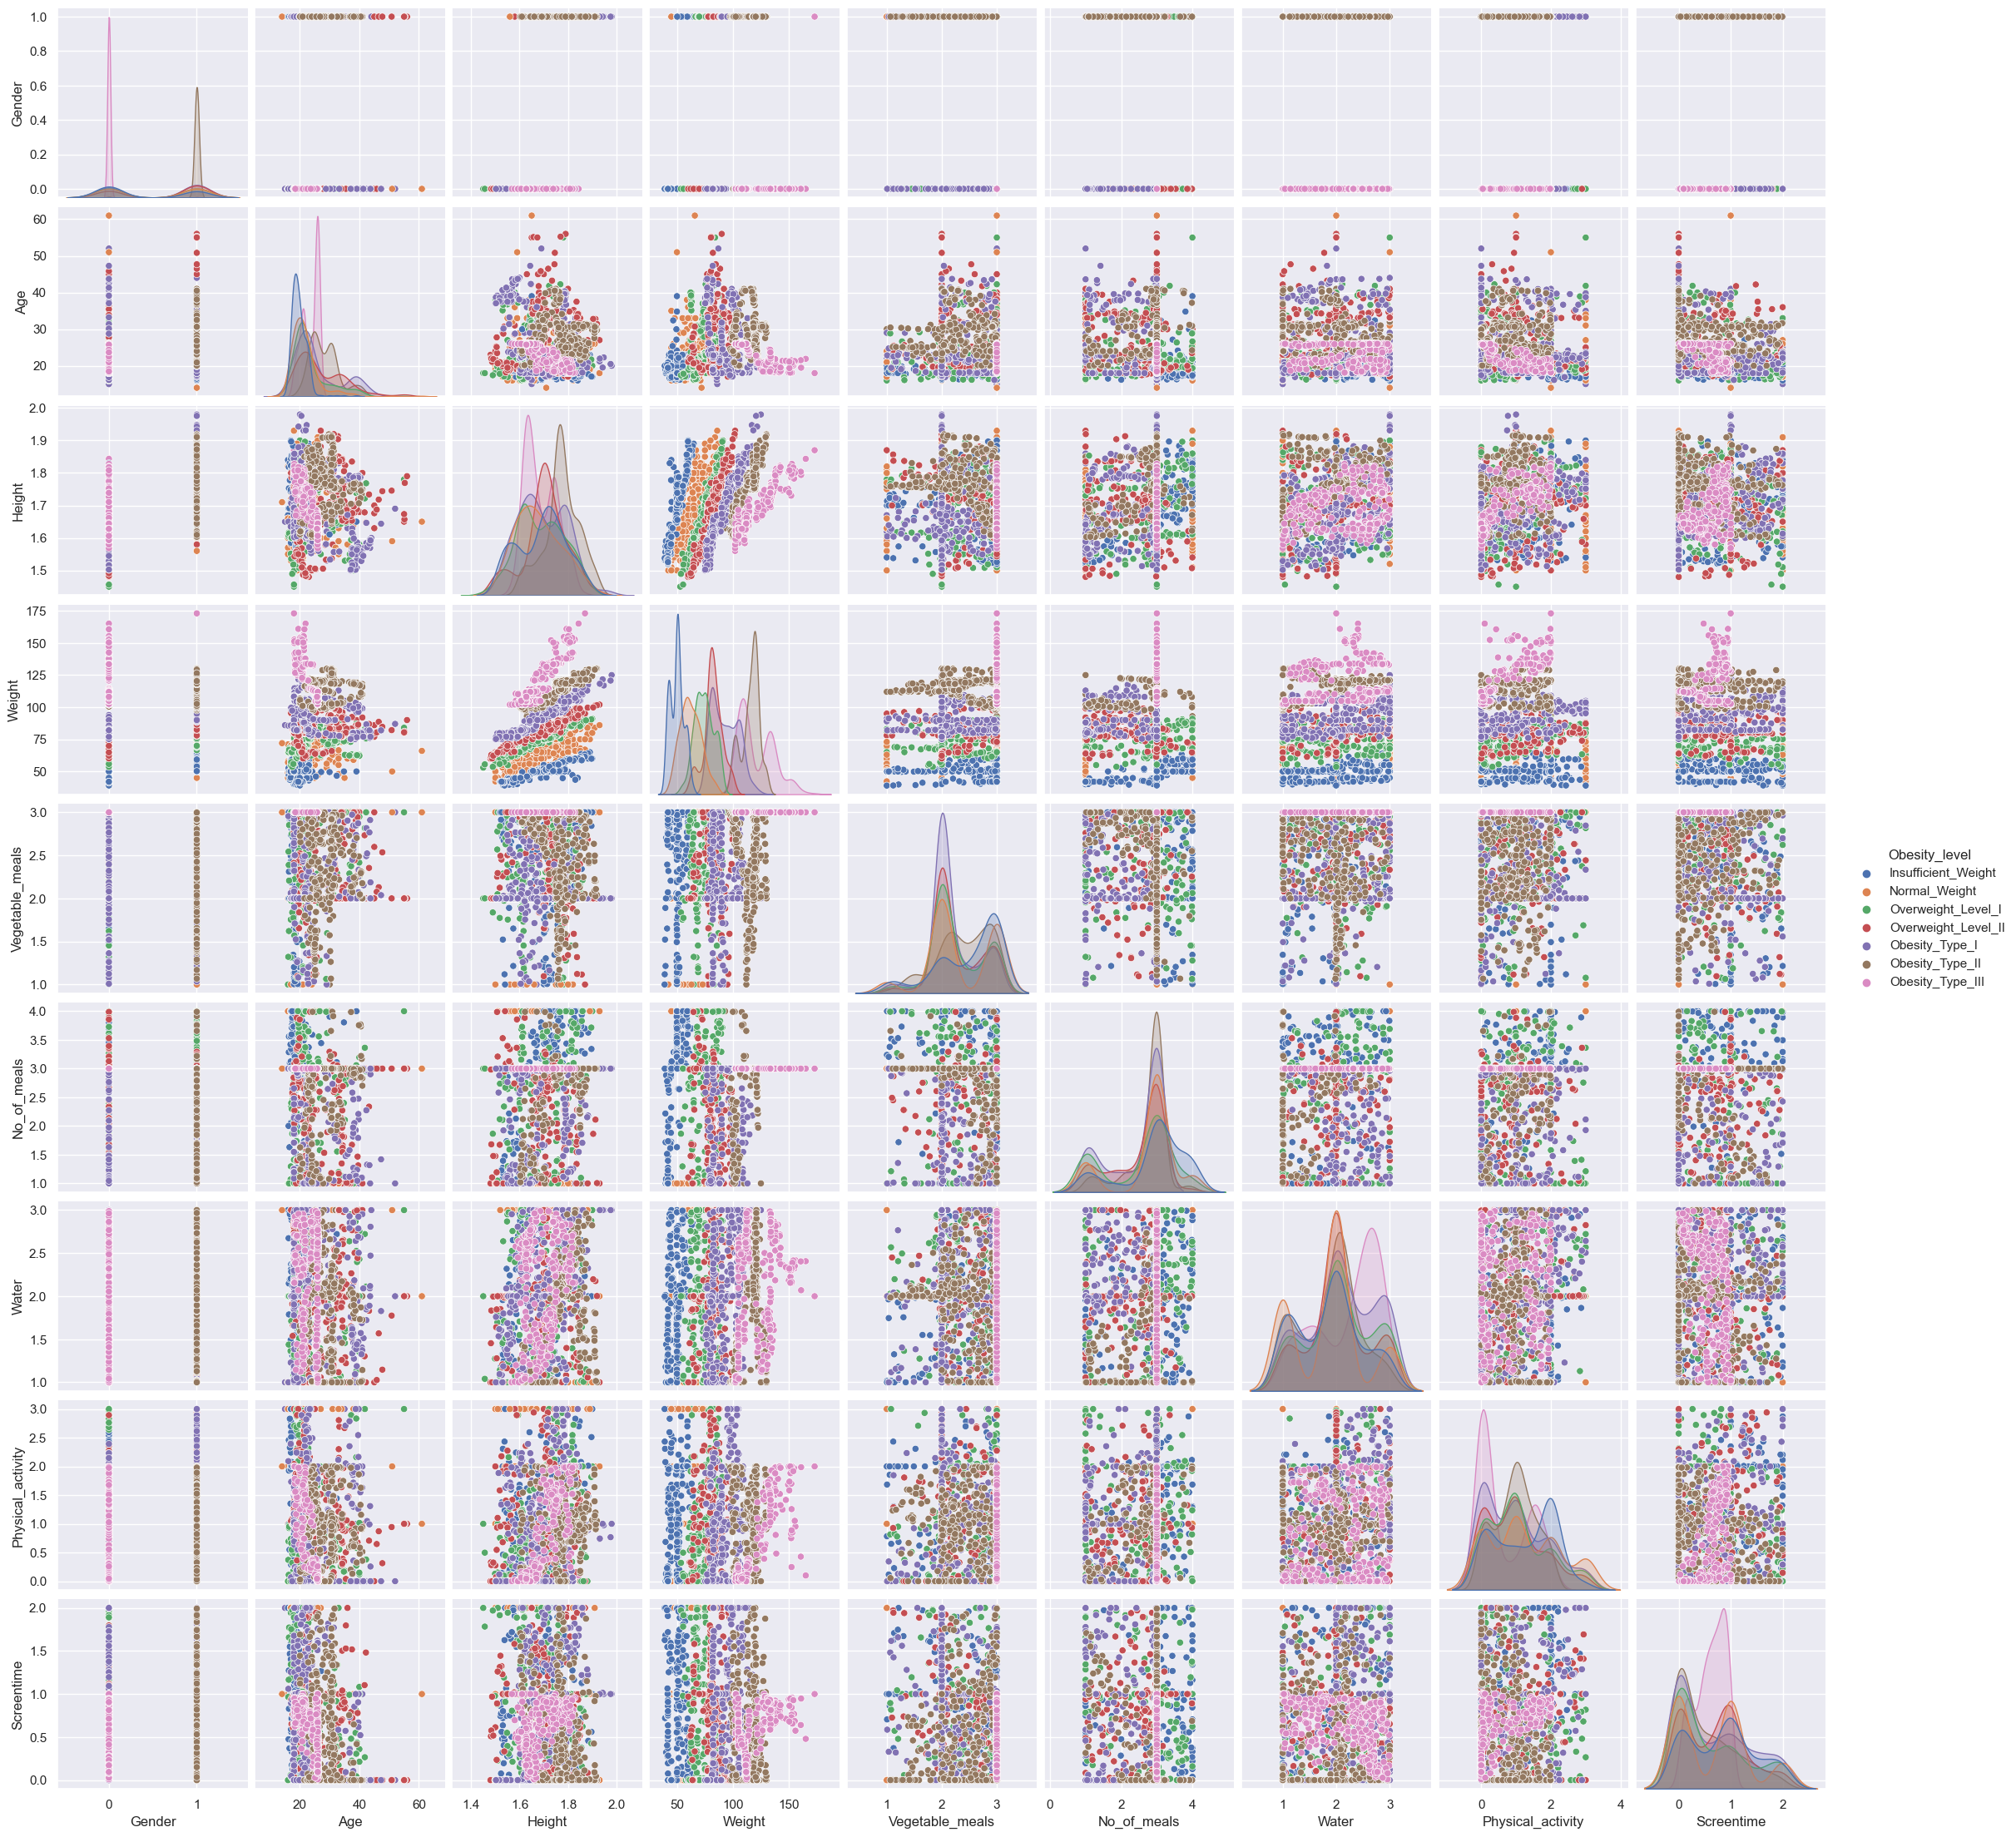

In [43]:
sns.pairplot(obesity, hue='Obesity_level')
plt.show()

In [44]:
#Created a linear kernel model
from sklearn.svm import SVC
svc = SVC(kernel="linear")
y_train = y_train.ravel()
y_test = y_test.ravel()
svm_model = svc.fit(X_train_scaled, y_train)
svm_model.score(X_train_scaled, y_train)

0.9591232227488151

In [45]:
#Making predictions
y_pred = svm_model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)


0.9598108747044918

In [46]:
#Also trying polynomial kernal
svc_poly = SVC(kernel="poly", degree = 2)
svm_poly = svc_poly.fit(X_train_scaled, y_train)
svm_poly.score(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)
accuracy_score(y_test, y_pred_poly)

print("Accuracy on training set using polynomial kernel:", svm_poly.score(X_train_scaled,y_train).round(3))
print("Accuracy on test set using polynomial kernel:", accuracy_score(y_test, y_pred_poly).round(3))

Accuracy on training set using polynomial kernel: 0.856
Accuracy on test set using polynomial kernel: 0.801


In [47]:
#And gaussian kernel
svc_rbf = SVC(kernel="rbf")
svm_rbf = svc_rbf.fit(X_train_scaled, y_train)
svm_rbf.score(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_score(y_test, y_pred_rbf)

print("Accuracy on training set using rbf kernel:", svm_rbf.score(X_train_scaled,y_train).round(3))
print("Accuracy on test set using rbf kernel:", accuracy_score(y_test, y_pred_rbf).round(3))

Accuracy on training set using rbf kernel: 0.943
Accuracy on test set using rbf kernel: 0.889


We can see that the linear model performed the best and is not overfitting, now we will find the ideal parameters using Gridsearch 

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Range of regularization parameters
}

#cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters: {'C': 100}


In [50]:
# Training the best SVM model
best_svm.fit(X_train_scaled, y_train)

# Evaluating on the training set
train_accuracy = best_svm.score(X_train_scaled, y_train)
print("Training accuracy:", train_accuracy)

# Evaluating on the test set
test_accuracy = best_svm.score(X_test_scaled, y_test)
print("Test accuracy:", test_accuracy)


Training accuracy: 0.9851895734597157
Test accuracy: 0.9810874704491725


In [51]:
#Looking at the importance of predictors on our target variable
importance_SVM = pd.DataFrame(np.absolute(svm_model.coef_[0]), index = X_train_scaled.columns, columns = ["Importance_svm"])
importance_SVM.sort_values(by = "Importance_svm", ascending = False)

Importance_svm
Weight                     7.263181
Height                     1.671259
Vegetable_meals            0.170621
Age                        0.137806
Gender                     0.074530
Snack_between_meals        0.054342
Physical_activity          0.050171
Water                      0.042406
SMOKE                      0.041002
Count_calories             0.035378
Screentime                 0.024973
High_calorie_diet          0.018668
Overweight_history         0.018642
Alcohol                    0.016971
No_of_meals                0.003910

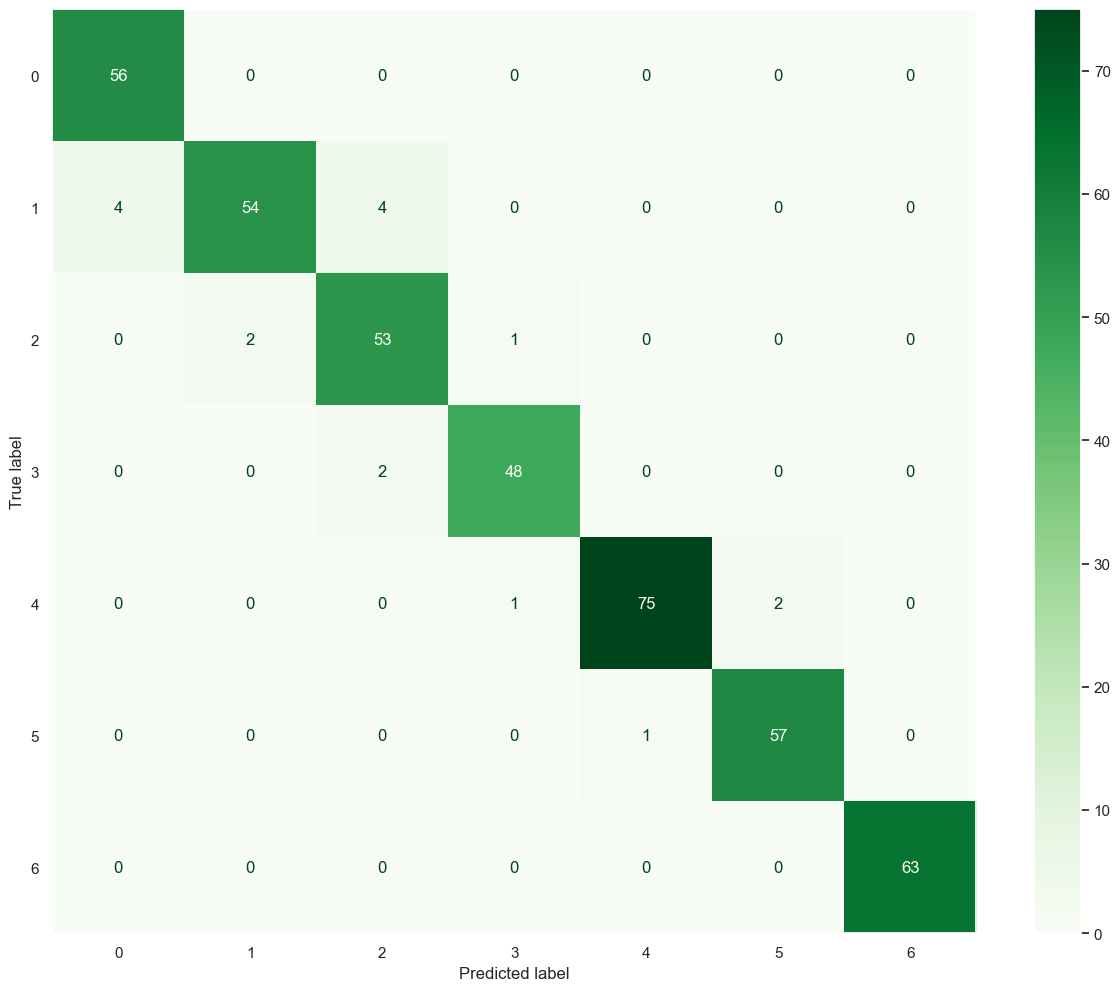

In [52]:
y_pred_svm = best_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

# confusion matrix - gives a deeper insight on how many predictions were correct for each class
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Greens)
plt.grid(False)
plt.show()

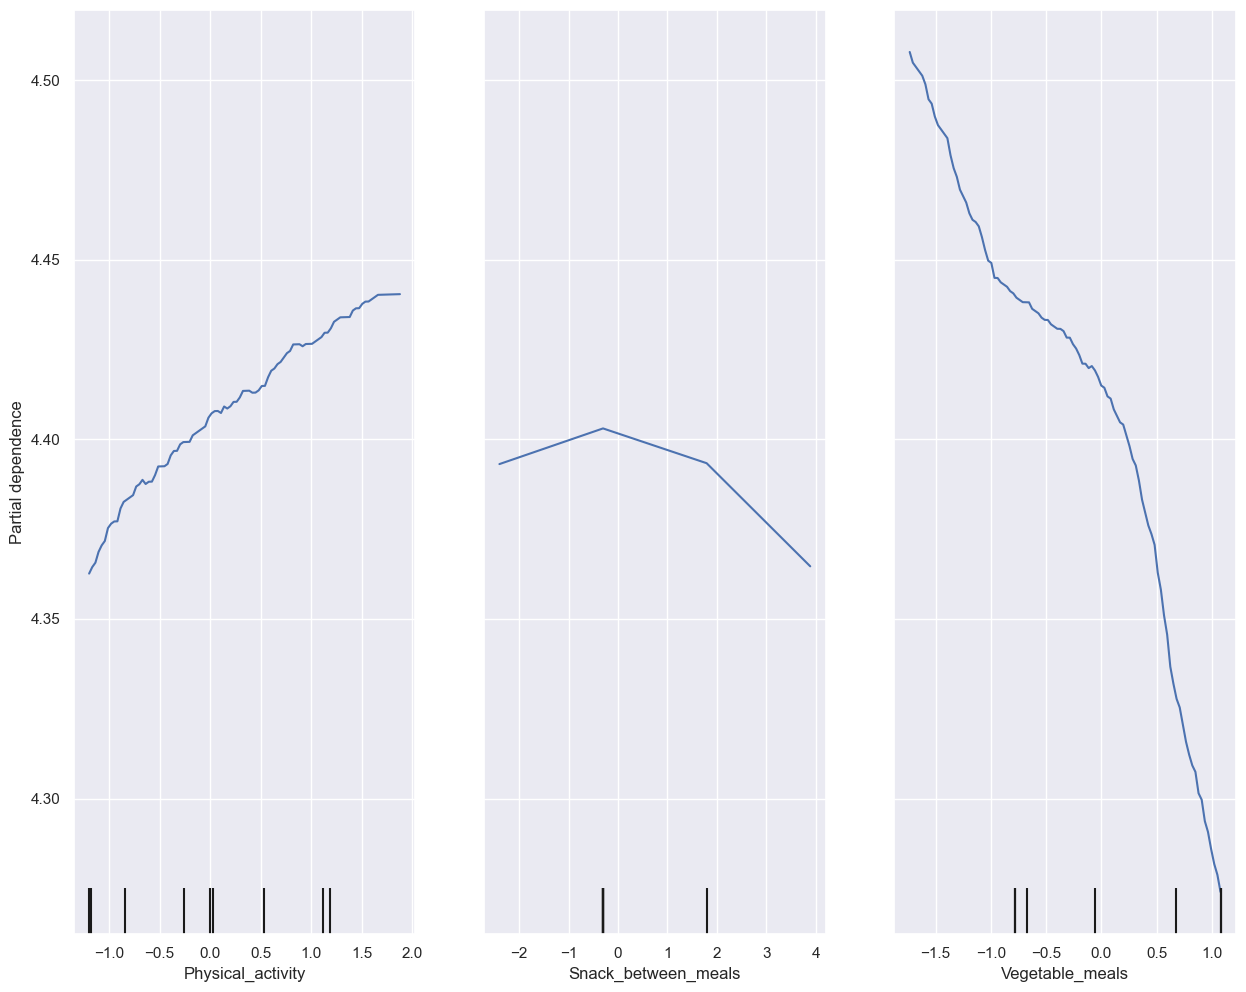

[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=6; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=8; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=6; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=4; total time=   0.0s
[CV] END ...................

In [54]:
#partial dependence plot
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(best_svm, X_train_scaled, [8, 11, 12],target=3) 
plt.show()

Here I chose the three categories that had the highest svm importance after height, weight, age and gender to see how these features affected the predictions of "Overweight_level_II". These PDPs have a very isightful output showing - 
1. Individuals with higher levels of physical activity are associated with a higher predicted outcome in the model -it suggests that higher levels of physical activity are associated with a lower risk of obesity
2. Forming a roughly parabolic shape, it suggests that moderate snacking between meals might be associated with higher predicted values (lower risk of obesity),while both excessive snacking and a complete absence of snacking are associated with lower predicted values
3. Individuals who consume more vegetables tend to have a lower predicted obesity level according to this model

## Conclusion
Overall, the Support Vector Machine model performs the best on this dataset with a 98% accuracy rate after hyperparameter tuning. After deeper analysis, SVM also provided deep and underlying relationships of the feautures to Obesity level. 